In [1]:
#import the functions from figurestyle.py which is outside the folder   
import sys
sys.path.append('..')
from figurestyle import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [35]:
# import a file with extension .eig
data = np.loadtxt('test_one_array.eig')
data = data[:,0:2]
data[:,0] = data[:,0] + 1
data[:,1] = data[:,1]*1e9
data

array([[1.00000000e+00, 1.46891208e+10],
       [2.00000000e+00, 1.68066317e+10],
       [3.00000000e+00, 1.73413427e+10],
       [4.00000000e+00, 1.75528759e+10],
       [5.00000000e+00, 1.76592927e+10],
       [6.00000000e+00, 1.77210242e+10],
       [7.00000000e+00, 1.77599553e+10],
       [8.00000000e+00, 1.77868191e+10],
       [9.00000000e+00, 1.78058010e+10],
       [1.00000000e+01, 1.78200679e+10]])

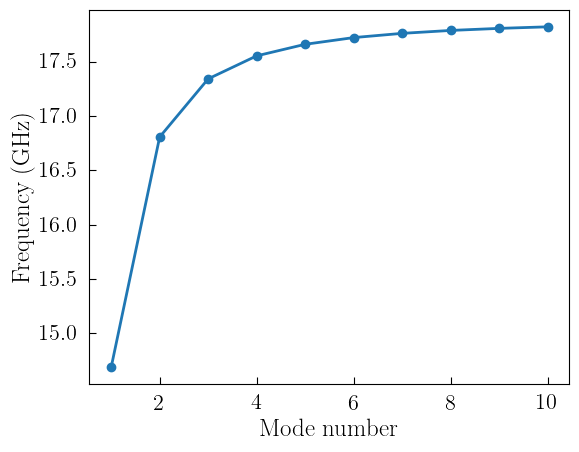

In [28]:
# plot the data
figure_features()
plt.plot(data[:,0], data[:,1]*1e-9, 'o-')
plt.xlabel('Mode number')
plt.ylabel('Frequency (GHz)')
plt.show()

In [29]:
plasma_frequency = 17.9e9 #Hz
Elj = 40e9 #Hz

h = 6.62607015e-34
e = 1.602e-19
phi_0 = h/2/e

junction_inductance = (phi_0/2/np.pi)**2/(Elj*h)
junction_capacitance = 1/(2*np.pi*plasma_frequency)**2/junction_inductance

# 1/(np.sqrt(junction_capacitance*junction_inductance))/2/np.pi

In [76]:
N = 76
Cj = junction_capacitance
f0 = plasma_frequency

def func(x, c0):
    return f0*np.sqrt((1-np.cos(np.pi*x/N))/(np.abs(c0)/2/Cj + 1-np.cos(np.pi*x/N)))

In [77]:
# fitting data with func function
popt, pcov = curve_fit(func, data[:,0], data[:,1])
popt

array([1.64540267e-17])

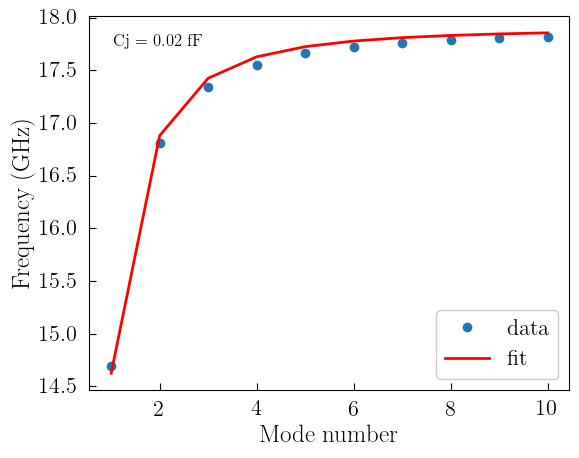

In [81]:
# plot the data and the fit
figure_features()
plt.plot(data[:,0], data[:,1]*1e-9, 'o', label='data')
plt.plot(data[:,0], func(data[:,0], *popt)*1e-9, 'r-', label='fit')
plt.xlabel('Mode number')
plt.ylabel('Frequency (GHz)')
plt.text(0.05, 0.95, 'Cj = %.2f fF' % (popt[0]*1e15), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.legend()
plt.show()